In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [130]:
data=pd.read_csv("/content/drive/MyDrive/tr1/possum.csv")

In [131]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [132]:
data_arr=data.values

print(data_arr.shape)

(104, 14)


<ipython-input-133-0034947e395a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

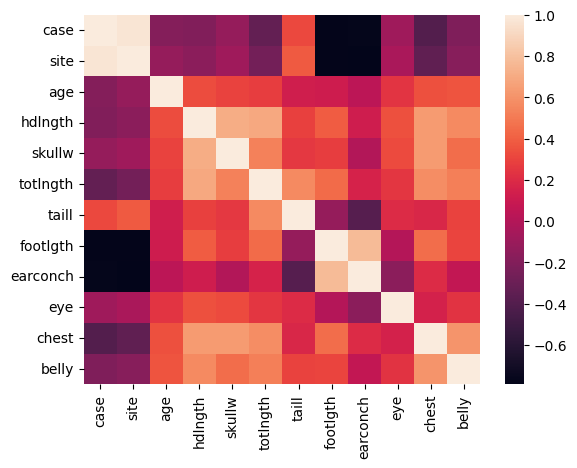

In [133]:
df=pd.read_csv("/content/drive/MyDrive/tr1/possum.csv")
df.describe()
correlation=df.corr()
sb.heatmap(correlation)

In [134]:
varlist=['Pop','sex']

In [135]:
def binary_map(x):
  return x.map({'Vic':1 , "other":0 ,'m':1 ,'f':0})

In [136]:
df[varlist]=df[varlist].apply(binary_map)

In [137]:
df.head(100)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,0,1,4,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
96,97,7,0,1,3,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5
97,98,7,0,1,5,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
98,99,7,0,0,3,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0


In [138]:
y=df['sex'].to_numpy()
y=y.reshape(-1,1)
print(y.shape)

(104, 1)


In [139]:
x=df.drop(['sex','case','site'],axis=1).to_numpy()
print(x.shape)

(104, 11)


In [140]:
np.random.seed(0)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [142]:
x_nrm=scaler.fit_transform(x)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=5,verbose=1,restore_best_weights=True)

In [145]:
x_train,x_val_test,y_train,y_val_test=train_test_split(x_nrm,y,train_size=0.8)

In [146]:
x_val , x_test ,y_val , y_test=train_test_split(x_val_test , y_val_test ,test_size=0.2)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
mdl=Sequential()
mdl.add(Dense(units=8 , activation='relu'))
mdl.add(Dense(4,'relu'))
mdl.add(Dense(1,'linear'))
mdl.compile(optimizer='adam',loss='mse',metrics='accuracy')

In [148]:
results=mdl.fit(x_train,y_train,epochs=140,validation_data=(x_val , y_val),callbacks=early_stopping)

Epoch 1/140
3/3 [==============================] - 1s 60ms/step - loss: 2.4807 - accuracy: 0.3976 - val_loss: 2.3982 - val_accuracy: 0.3750
Epoch 2/140
3/3 [==============================] - 0s 12ms/step - loss: 2.3482 - accuracy: 0.3976 - val_loss: 2.2949 - val_accuracy: 0.3750
Epoch 3/140
3/3 [==============================] - 0s 12ms/step - loss: 2.2320 - accuracy: 0.3976 - val_loss: 2.1951 - val_accuracy: 0.3750
Epoch 4/140
3/3 [==============================] - 0s 11ms/step - loss: 2.1138 - accuracy: 0.3976 - val_loss: 2.0994 - val_accuracy: 0.3750
Epoch 5/140
3/3 [==============================] - 0s 12ms/step - loss: 1.9995 - accuracy: 0.3976 - val_loss: 2.0083 - val_accuracy: 0.3750
Epoch 6/140
3/3 [==============================] - 0s 13ms/step - loss: 1.9019 - accuracy: 0.3976 - val_loss: 1.9217 - val_accuracy: 0.3750
Epoch 7/140
3/3 [==============================] - 0s 13ms/step - loss: 1.8037 - accuracy: 0.3976 - val_loss: 1.8384 - val_accuracy: 0.3750
Epoch 8/140
3/3 [===

In [149]:
y_test_prd=mdl.predict(x_test)

1/1 [==============================] - 0s 41ms/step


In [150]:
train_loss=results.history['loss']
val_loss=results.history['val_loss']

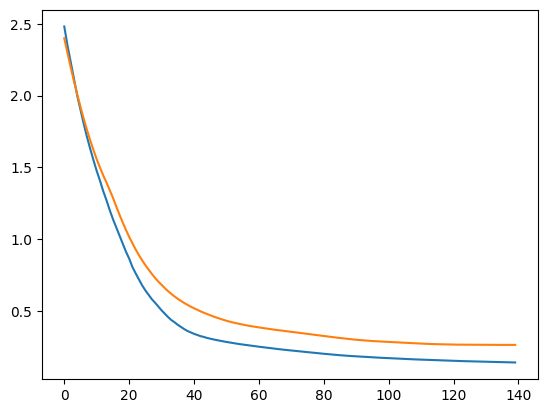

In [151]:
plt.plot(train_loss)
plt.plot(val_loss)

In [154]:
from sklearn.metrics import mean_squared_error as mse 


In [157]:
print(mse(y_test , y_test_prd))

0.3325354502742215


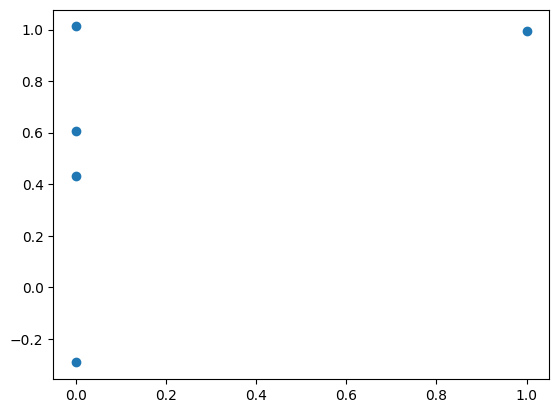

In [158]:
plt.plot(y_test , y_test_prd , 'o')